In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set_style('whitegrid')
#import tensorflow as tf
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

SMALL_SIZE = 10
MEDIUM_SIZE = 12

plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=MEDIUM_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rcParams['figure.dpi']=150

In [2]:
data = pd.read_csv('marketing_campaign.csv',sep = '\t')
data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
raw_data.info()

NameError: name 'raw_data' is not defined

In [ ]:
data = data.dropna()

In [ ]:
data.describe()

In [ ]:
for i in data.columns:
    print(i,' :',data[i].nunique())

In [ ]:
data = data.drop(['Z_CostContact'], axis = 1)
data = data.drop(['Z_Revenue'], axis = 1)

In [ ]:
data.head(11)

In [4]:
data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [5]:
data['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [6]:
data1 = data.copy()  

In [7]:
data1['Marital_Status'] = data1['Marital_Status'].map({'Single':0, 'Together':1, 'Married':1,
                                                           'Divorced':0, 'Widow':0, 'Alone':0, 'Absurd':0, 'YOLO':0})
data1['Marital_Status'].unique()

array([0, 1], dtype=int64)

In [8]:
data1['Marital_Status'].value_counts()

1    1444
0     796
Name: Marital_Status, dtype: int64

In [9]:
data1['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [10]:
data1['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [11]:
data2 = data1.copy()

In [12]:
data2['Education'] = data1['Education'].replace({'Graduation':1, 'PhD':2, 'Master':2, 'Basic':0, '2n Cycle':0})
data2['Education'].value_counts()

1    1127
2     856
0     257
Name: Education, dtype: int64

In [13]:
data2= data2.reset_index(drop=True)

In [14]:
data2['Dt_Customer'] = pd.to_datetime(data2['Dt_Customer'], format='%d-%m-%Y')

In [15]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   int64         
 3   Marital_Status       2240 non-null   int64         
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [16]:
data2['Dt_Customer'][0].year

2012

In [17]:
data2['Year_Birth'][0]

1957

In [18]:
data2['Dt_Customer'].max() #Thus, we will assume that data was collected in 2014

Timestamp('2014-06-29 00:00:00')

In [19]:
int(data2['Dt_Customer'][10].year)

2013

In [20]:
Age = []

In [21]:
print('As the Maximum value of customers joined year is 2014, we shall assume that data was collected in 2014')

As the Maximum value of customers joined year is 2014, we shall assume that data was collected in 2014


In [22]:
for i in range(data2.shape[0]):
    a = int(2014) - data2['Year_Birth'][i]
    Age.append(a)

In [23]:
data2['Age'] = Age

In [24]:
data_s = data2.copy()

###Outliers detection and relationship between variables

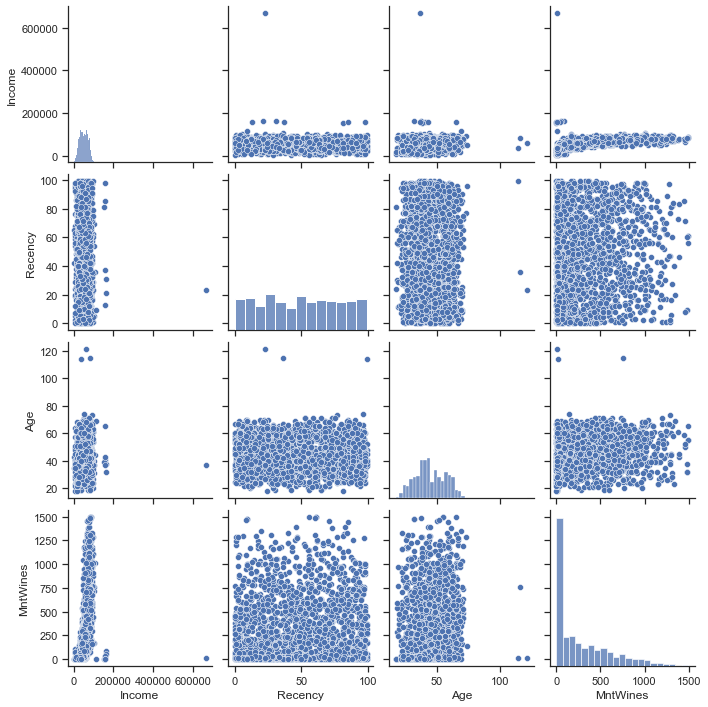

In [25]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data_s, vars=["Income", "Recency", "Age", 'MntWines']) #, hue="Cluster")
plt.show()

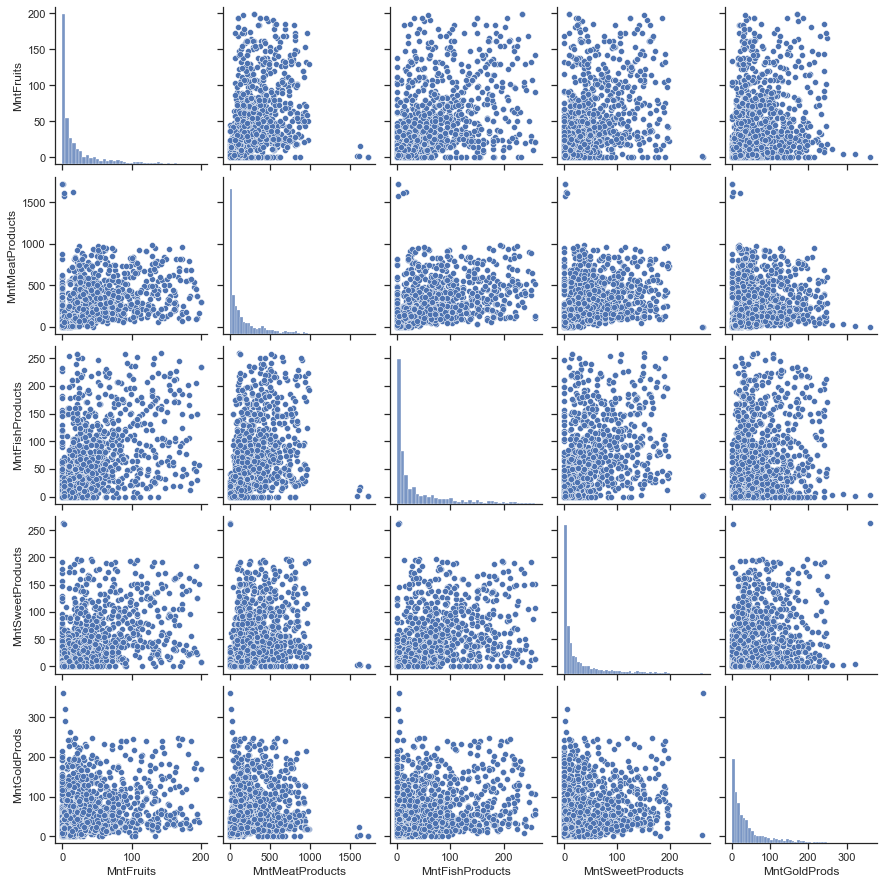

In [26]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data_s, vars=['MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds'])
plt.show()

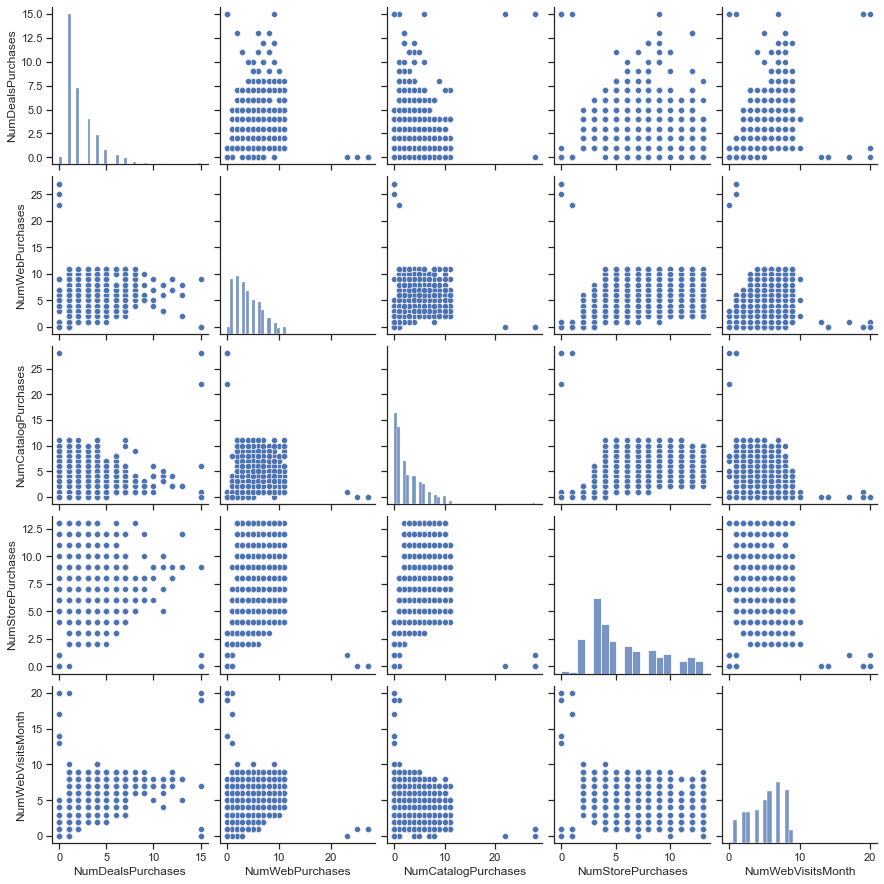

We will remove certain outliers that are prone to distort our results


In [27]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data_s, vars=['NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth'])
plt.show()
print('We will remove certain outliers that are prone to distort our results')

##Removing Outliers
#As indentified from the graphs above, we will adjust the data accordingly. This will remove the outliers.

#Ages greater than 100
#Income greater than 60,000
#MntMeatProducts greater than 1500
MntSweetProducts greater than 250
NumWebPurchases greater than 20
NumCatalogPurchases greater than 20

In [28]:
data_s = data2
data_s = data_s[data_s['Age'] < 100]
data_s = data_s[data_s['Income'] < 60000]
data_s = data_s[data_s['MntMeatProducts'] < 1500]
data_s = data_s[data_s['MntSweetProducts'] < 250]
data_s = data_s[data_s['MntGoldProds'] < 300]
data_s = data_s[data_s['NumWebPurchases'] < 20]
data_s = data_s[data_s['NumCatalogPurchases'] < 20]

In [29]:
data_s = data_s.reset_index(drop=True)

In [30]:
data_snum=data_s.select_dtypes(np.number)
for i in data_snum.columns:
    print((i,data_snum[i].value_counts(normalize=True)*100))

('ID', 5524    0.072993
5763    0.072993
3340    0.072993
5751    0.072993
4093    0.072993
          ...   
4303    0.072993
2371    0.072993
8897    0.072993
20      0.072993
9405    0.072993
Name: ID, Length: 1370, dtype: float64)
('Year_Birth', 1976    4.452555
1971    4.379562
1975    4.087591
1973    4.014599
1978    3.941606
1972    3.795620
1974    3.503650
1969    3.284672
1965    3.065693
1970    2.992701
1977    2.773723
1968    2.627737
1963    2.408759
1956    2.335766
1966    2.335766
1979    2.335766
1984    2.262774
1981    2.262774
1986    2.116788
1983    2.116788
1960    2.043796
1955    1.970803
1952    1.970803
1967    1.897810
1959    1.897810
1985    1.824818
1958    1.824818
1980    1.751825
1982    1.751825
1951    1.751825
1962    1.678832
1957    1.678832
1954    1.678832
1950    1.678832
1964    1.532847
1989    1.532847
1953    1.532847
1961    1.240876
1988    1.240876
1987    1.240876
1949    1.094891
1990    0.948905
1992    0.583942
1948    0.583942
194

C:\Users\vsman\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


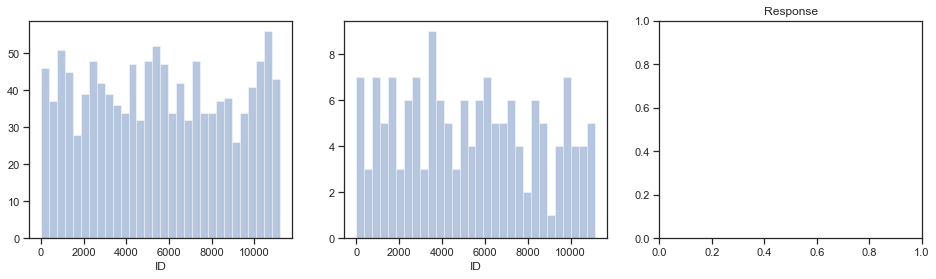

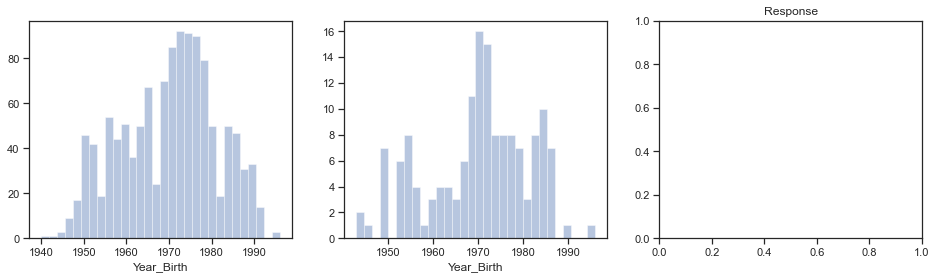

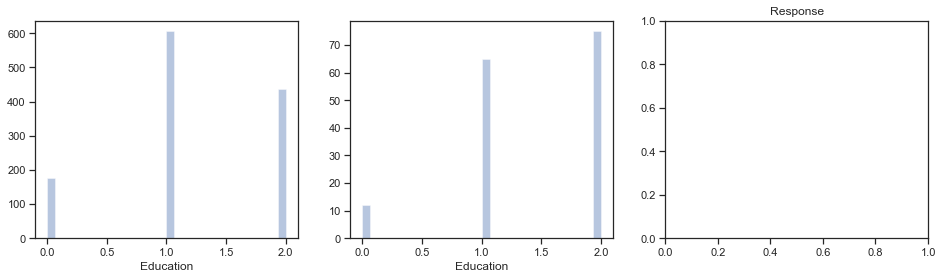

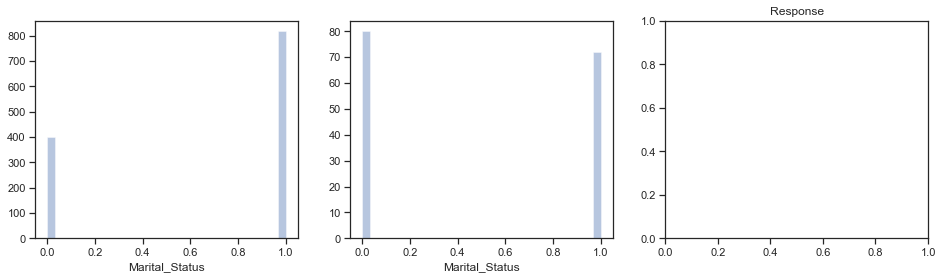

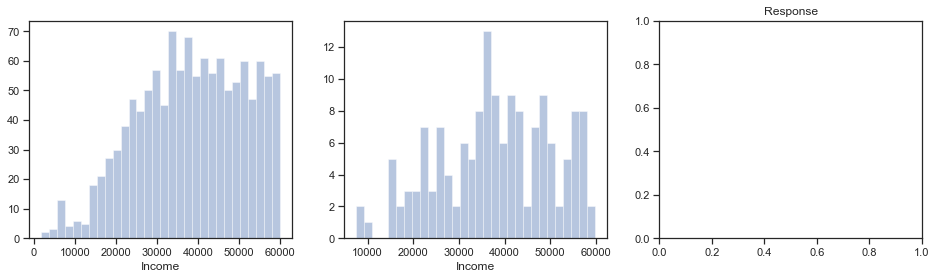

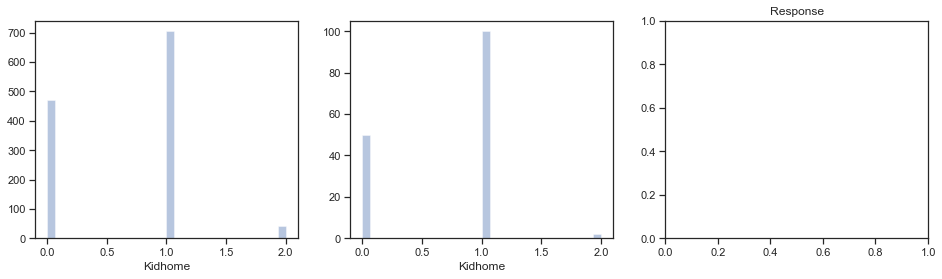

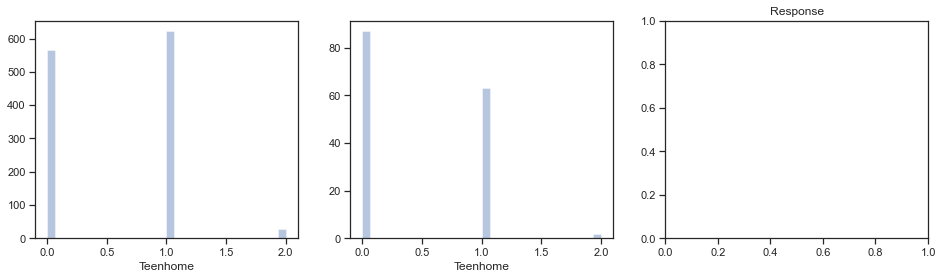

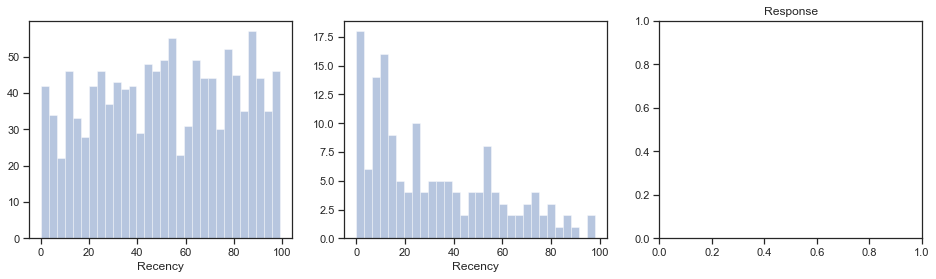

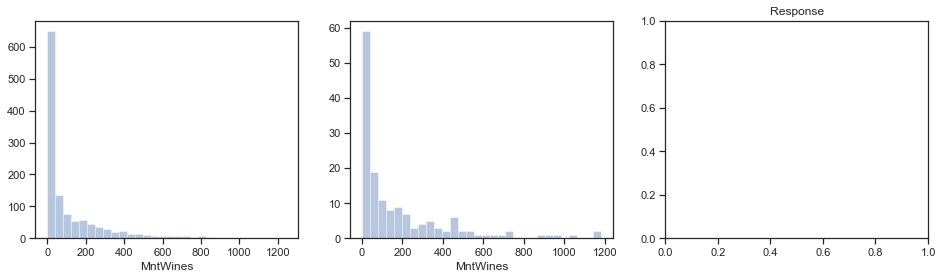

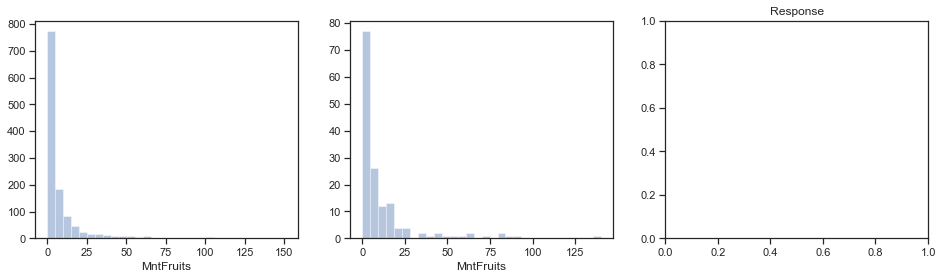

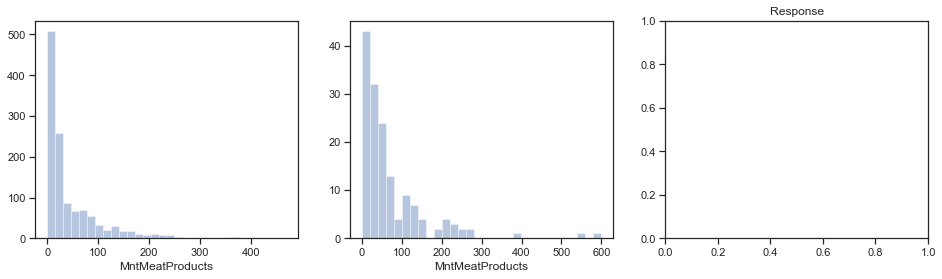

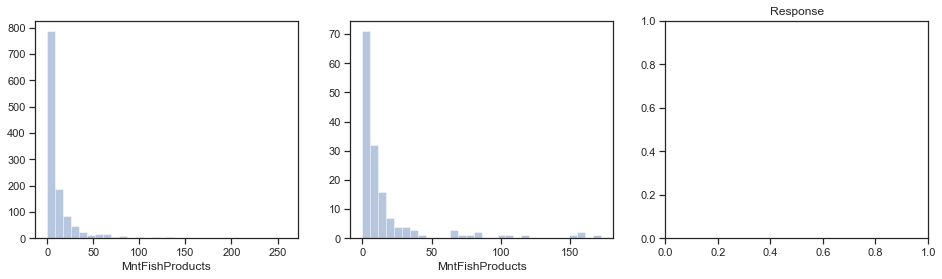

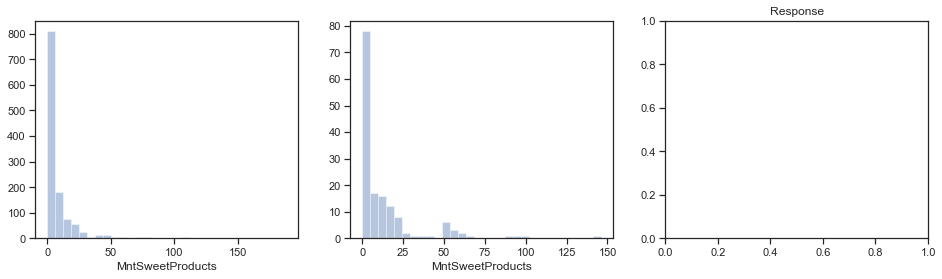

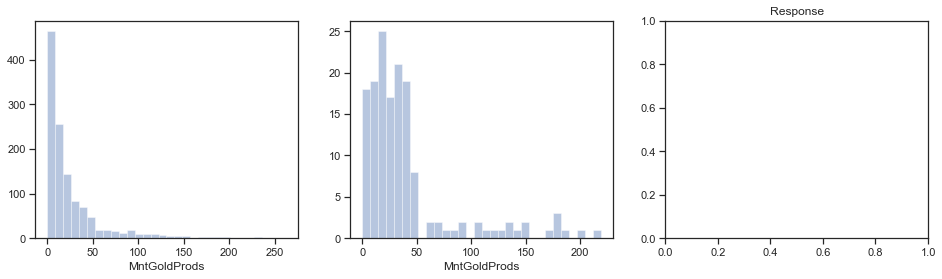

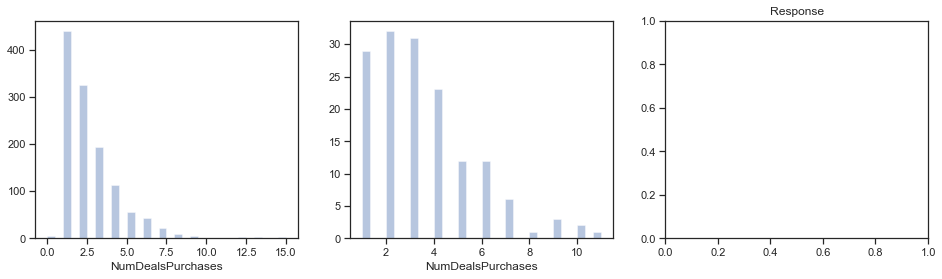

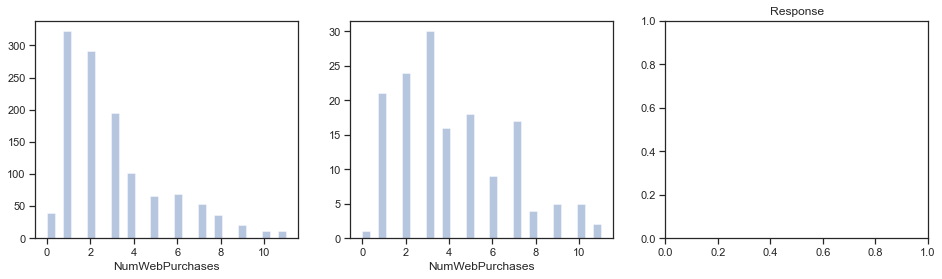

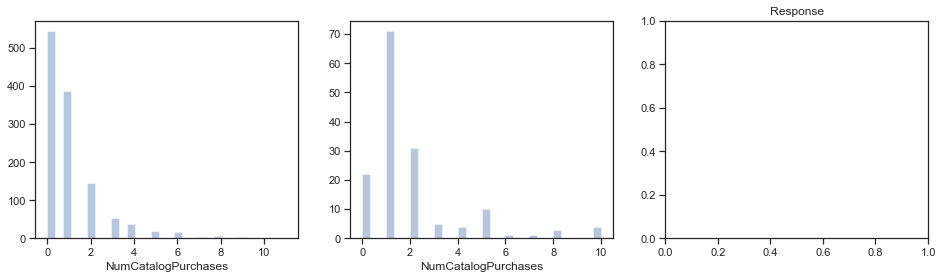

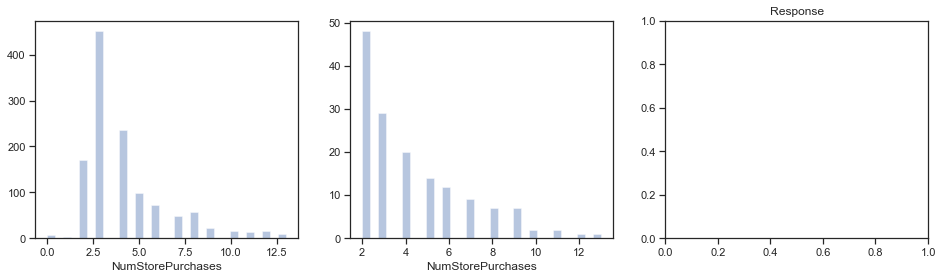

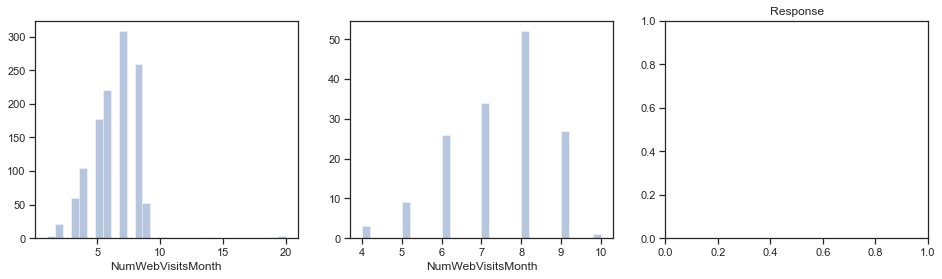

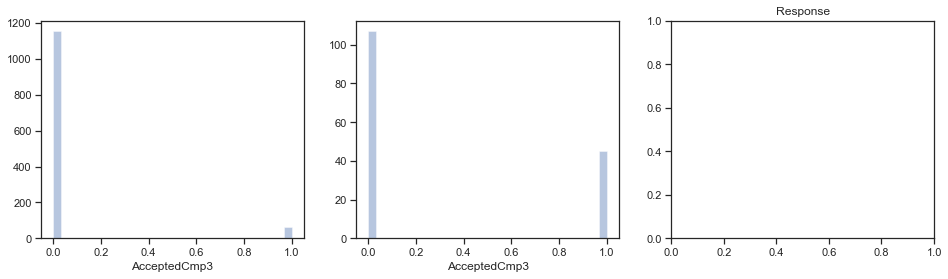

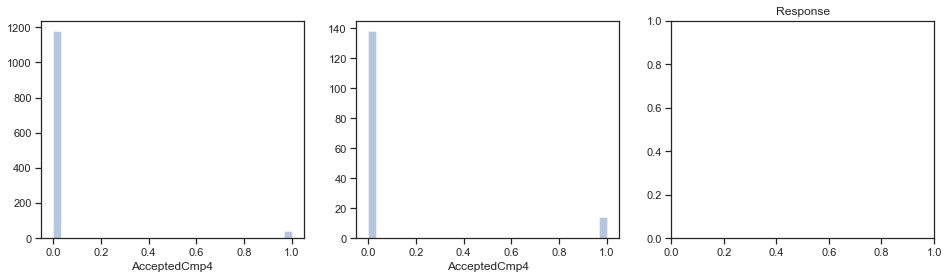

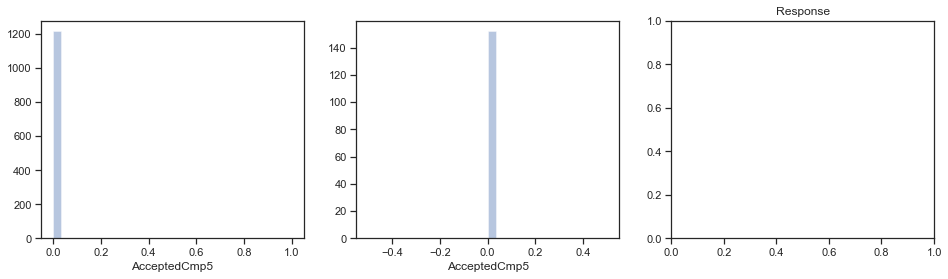

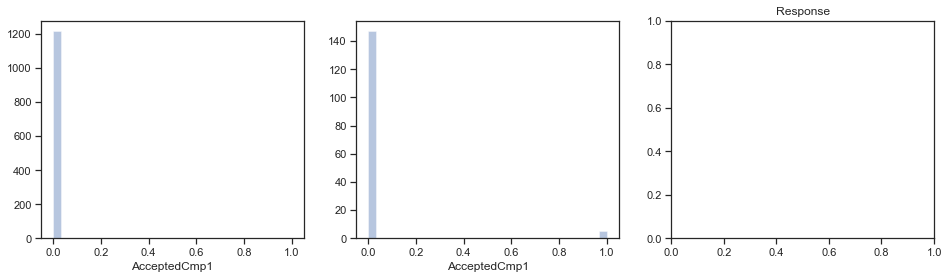

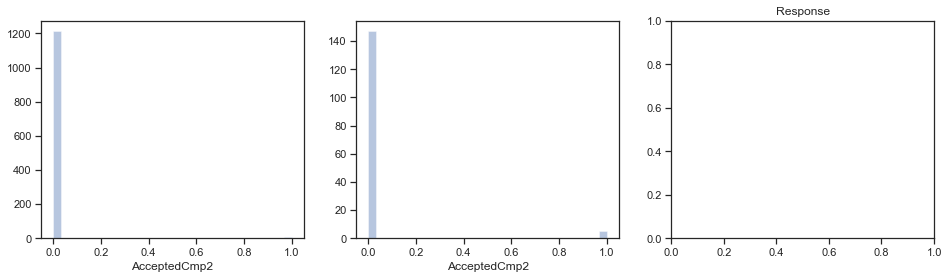

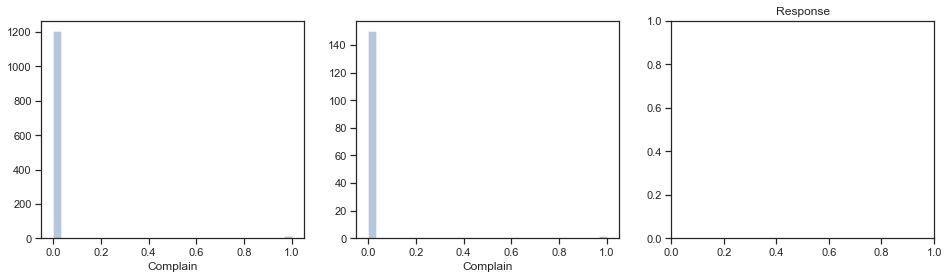

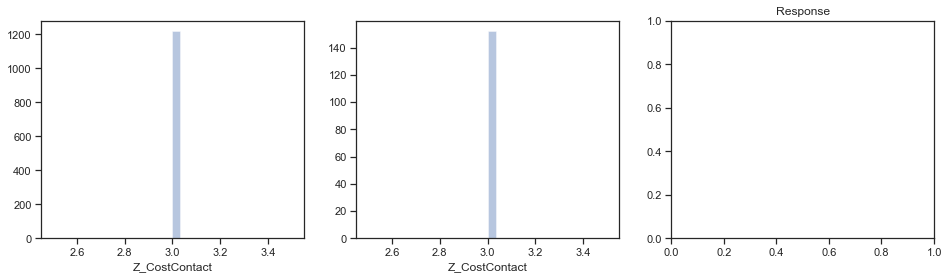

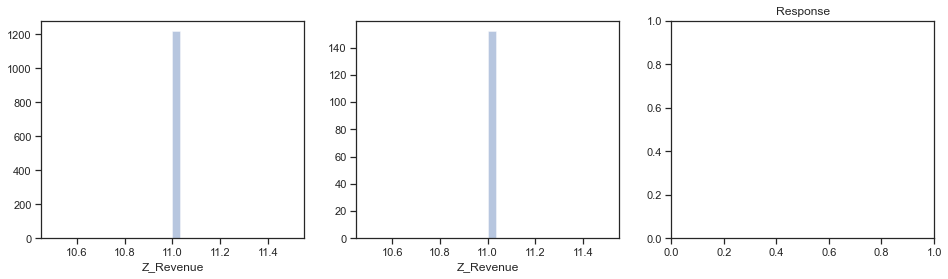

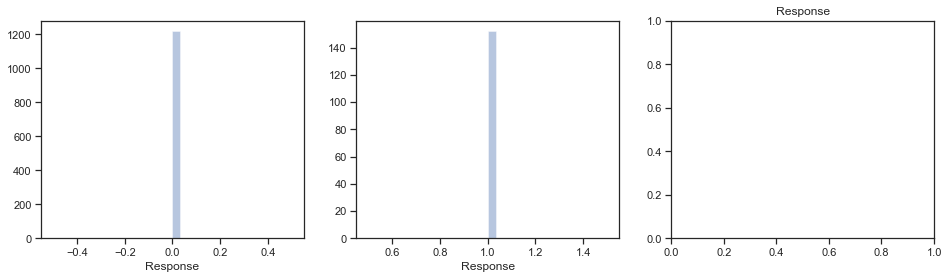

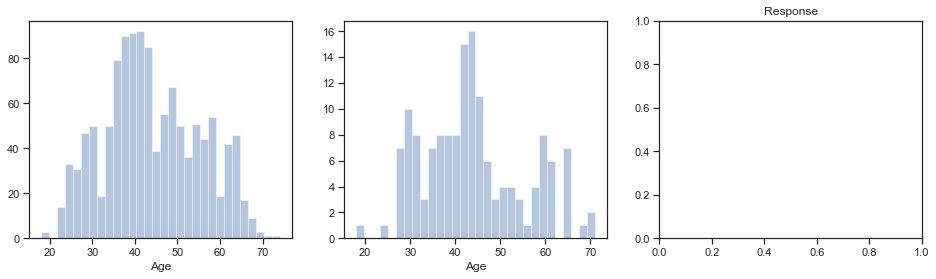

In [34]:
for i in data_snum.columns:
    fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 4))
    sns.distplot(data_snum[data_snum['Response']== 0][i], bins = 30, ax = axes[0], kde = False)
    plt.title('No response')
    sns.distplot(data_snum[data_snum['Response']== 1][i], bins = 30, ax = axes[1], kde = False)
    plt.title('Response')
    plt.show()

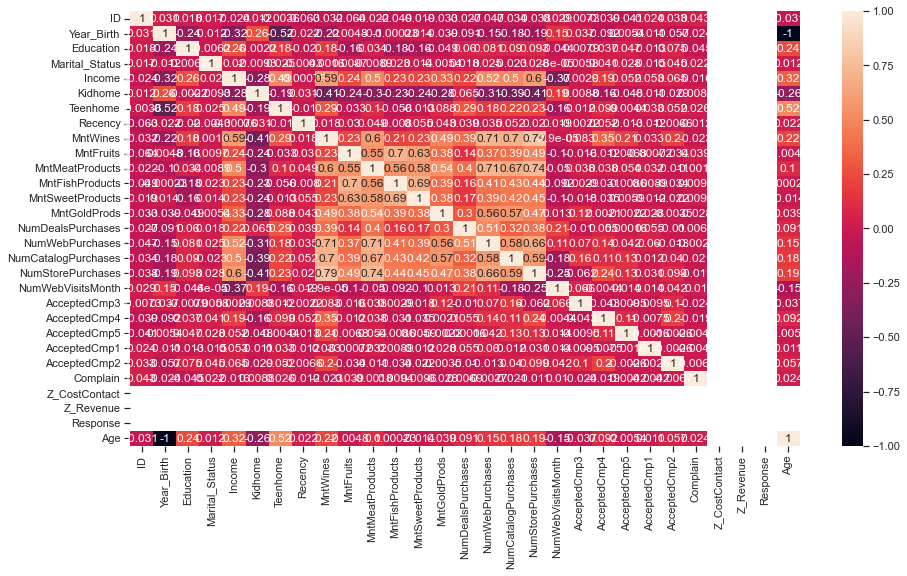

In [35]:
#Multivariate Analysis
#Let's find out how much they are correlated.
plt.figure(figsize=(15,8))
sns.heatmap(data_snum[data_snum['Response']== 0].corr(),annot=True)
plt.show()

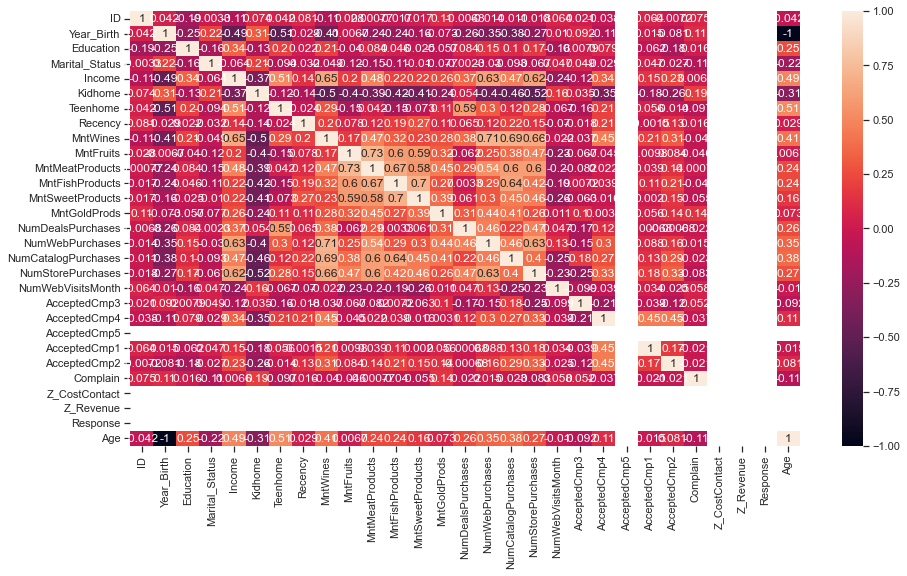

In [36]:
plt.figure(figsize=(15,8))
sns.heatmap(data_snum[data_snum['Response']== 1].corr(),annot=True)
plt.show()

#scaling the data 

In [39]:
x_scaled_tbs = preprocessing.scale(data_snum)
x_scaled_tbs

array([[-0.00605934, -1.16344293, -0.34966438, ...,  0.        ,
         2.83075218,  1.16344293],
       [-1.02917565, -1.4313281 , -0.34966438, ...,  0.        ,
        -0.353263  ,  1.4313281 ],
       [ 0.19489903,  1.24752367, -0.34966438, ...,  0.        ,
        -0.353263  , -1.24752367],
       ...,
       [ 0.86374223,  0.35457308, -0.34966438, ...,  0.        ,
        -0.353263  , -0.35457308],
       [ 0.52718278,  0.9796385 , -0.34966438, ...,  0.        ,
        -0.353263  , -0.9796385 ],
       [ 1.17922854, -1.4313281 ,  1.13343222, ...,  0.        ,
         2.83075218,  1.4313281 ]])

In [44]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
# encode class labels to integers
le = LabelEncoder()
y_encoded = le.fit_transform(data_snum['Response'])
data_snum['Response'] = y_encoded

# Principal Component Analysis
pca = PCA(n_components=3)
ugriz = pca.fit_transform(data_snum)

# update dataframe 
data_snum1 = pd.concat((data_snum, pd.DataFrame(ugriz)), axis=1)
data_snum1.rename({0: 'PCA_1', 1: 'PCA_2', 2: 'PCA_3'}, axis=1, inplace = True)
data_snum1.head()

C:\Users\vsman\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,PCA_1,PCA_2,PCA_3
0,5524,1957,1,0,58138.0,0,0,58,635,88,...,0,0,0,3,11,1,57,-19761.102034,157.007489,410.495633
1,2174,1954,1,0,46344.0,1,1,38,11,1,...,0,0,0,3,11,0,60,-7991.188981,-3297.909402,-201.959780
2,6182,1984,1,1,26646.0,1,0,26,11,4,...,0,0,0,3,11,0,30,11741.157194,532.773324,-13.887875
3,5324,1981,2,1,58293.0,1,0,94,173,43,...,0,0,0,3,11,0,33,-19912.640556,-40.855501,-125.919200
4,965,1971,1,0,55635.0,0,1,34,235,65,...,0,0,0,3,11,0,43,-17294.690258,-4423.658818,-37.958902


In [45]:
scaler = MinMaxScaler()
sdss = scaler.fit_transform(data_snum.drop('Response', axis=1))

In [48]:
X_train, X_test, y_train, y_test = train_test_split(data_snum, data_snum['Response'], test_size=0.33)

In [49]:
xgb = XGBClassifier(n_estimators=100)
training_start = time.perf_counter()
xgb.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = xgb.predict(X_test)
prediction_end = time.perf_counter()
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

C:\Users\vsman\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:45:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost's prediction accuracy is: 100.00
Time consumed for training: 0.544
Time consumed for prediction: 0.01621 seconds


In [55]:
from sklearn.model_selection import cross_val_score
from warnings import filterwarnings
filterwarnings('ignore')
xgb_cv = XGBClassifier(n_estimators=100)
scores = cross_val_score(xgb_cv, X_train, y_train, cv=10)
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

[06:52:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:52:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:52:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:52:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

Cross validating the models showed that the accuracy values were
in fact not arbitary and proofed that both models are performing very well.

#classification report

In [61]:
X_train.shape

(917, 29)

In [62]:
y_train.shape

(917,)

In [64]:
predictions = cross_val_predict(xgb, data_snum.drop('Response', axis=1), data_snum['Response'], cv=3)
confusion_matrix(data_snum['Response'], predictions)

[07:10:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:10:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:10:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([[1178,   40],
       [ 108,   44]], dtype=int64)

In [65]:
print("Precision:", precision_score(data_snum['Response'], predictions, average='micro'))
print("Recall:",recall_score(data_snum['Response'], predictions, average='micro'))

Precision: 0.891970802919708
Recall: 0.891970802919708


The first row shows that out of 1218 stars, 1178 were classified correctly as non-responded people. 
40 people were classified incorrectly as non-responded people. 
The second row shows out of 152 responded people 108 were classified correctly as responded people. 
44  were classified incorrectly as non-responded people.

In [ ]:
Precision is the fraction of events where the algorithm classified an object of type t correctly out of all occurences of the algorithm classifying objects of type t.

Recall is the fraction of events where the algorithm classified an object of type t correctly when the true type of that object was actually t.

Precision in our case:

For every class its calculated how many objects were classified as responded (or non-responded) in response to non-responded.
Recall in our case:

For every class how many objects were classified as responded (or non-responded) in relation to the total amount of predictions.

In both cases our algorithm did a very good job. The highest precision or recall value a predictor can have is 0.89

F1-Score
One can combine precision and recall into one score, which is called the F-score. The F-score is computed with the harmonic mean of precision and recall. Note that it assigns much more weight to low values. As a result of that, the classifier will only get a high F-score, if both recall and precision are high.


In [66]:
print("F1-Score:", f1_score(data_snum['Response'], predictions, average='micro'))

F1-Score: 0.8919708029197079


In [68]:
!pip install shap

  Attempting uninstall: packaging
    Found existing installation: packaging 19.0
    Uninstalling packaging-19.0:
      Successfully uninstalled packaging-19.0


You should consider upgrading via the 'c:\users\vsman\anaconda3\python.exe -m pip install --upgrade pip' command.


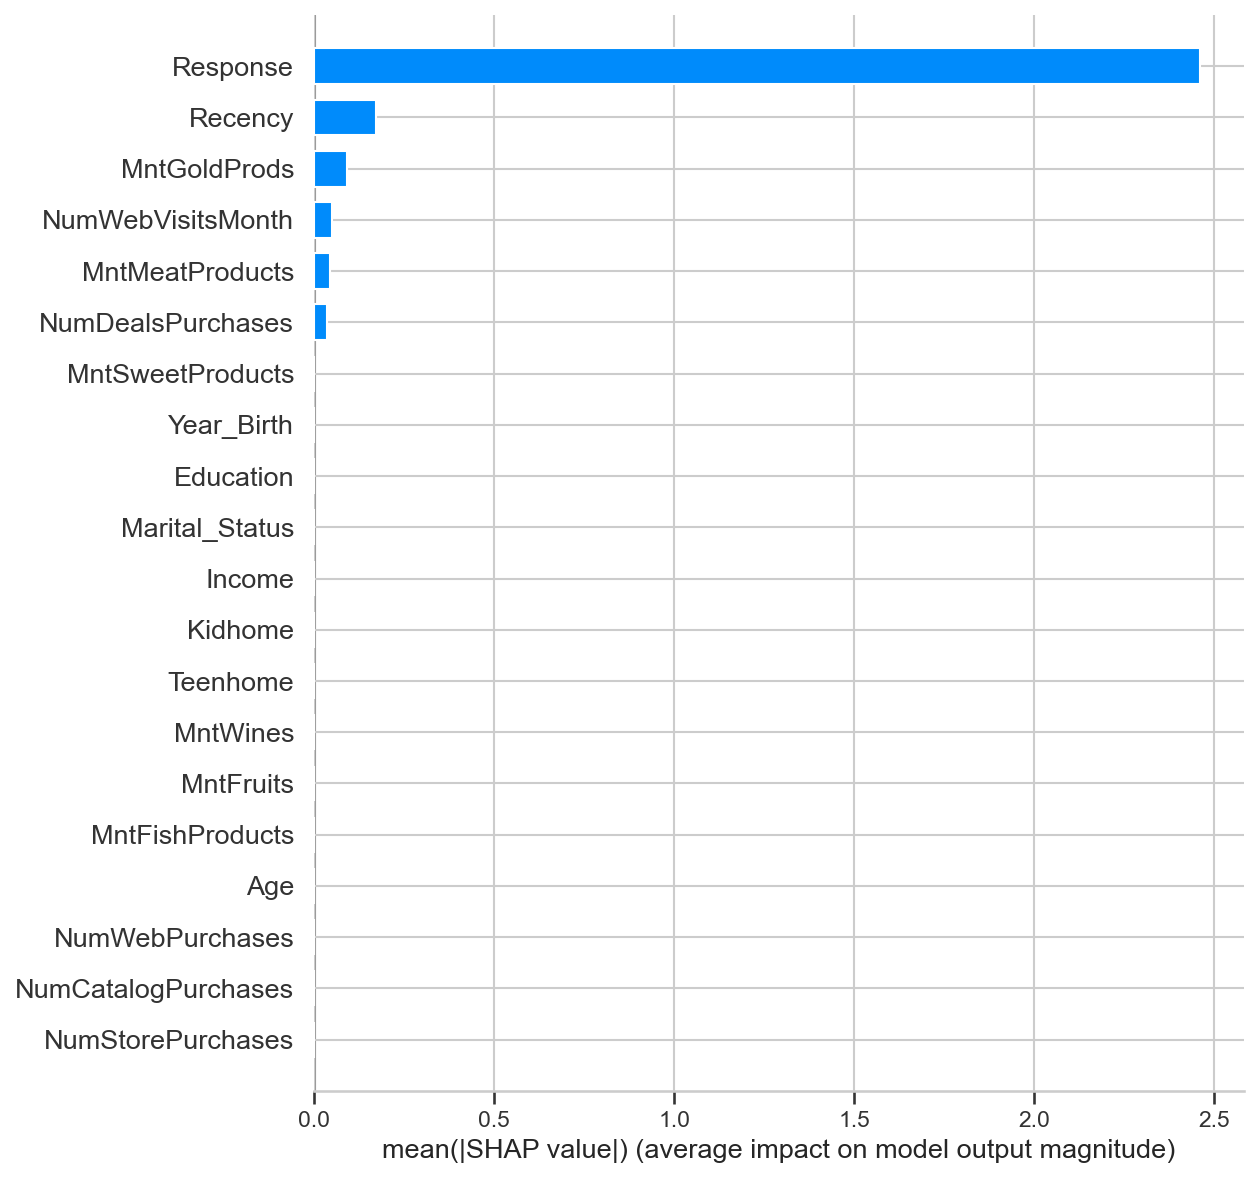

In [69]:
import shap
shap_values = shap.TreeExplainer(xgb).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")